In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn.model_selection as mod

%matplotlib inline

In [225]:
raw_data = pd.read_csv('CarPrice_Assignment.csv')

In [226]:
raw_data.drop(['car_ID','CarName','enginelocation','fuelsystem'],axis = 1,inplace=True)

I have dropped the above 4 columns as, car id is not imp. for regression,I dont know how to use car name in algorithm, engine location is dropped because there are very few case of rear engine and I don't know how the fuel system would effect the price of car

In [227]:
raw_data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [228]:
raw_data['symboling(3)'] = raw_data['symboling'].apply(lambda x : 1 if x==3 else 0)

In [229]:
raw_data['symboling(1)'] = raw_data['symboling'].apply(lambda x : 1 if x==1 else 0)

In [230]:
raw_data['symboling(2)'] = raw_data['symboling'].apply(lambda x : 1 if x==2 else 0)

In [231]:
raw_data['symboling(0)'] = raw_data['symboling'].apply(lambda x : 1 if x==0 else 0)

In [232]:
raw_data['symboling(-1)'] = raw_data['symboling'].apply(lambda x : 1 if x == -1 else 0)

In [233]:
raw_data['symboling(-2)'] = raw_data['symboling'].apply(lambda x : 1 if x == -2 else 0)

In [234]:
raw_data.drop(['symboling'],axis=1,inplace=True)

In [235]:
raw_data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [236]:
raw_data['fueltype'] = raw_data['fueltype'].apply(lambda x : 1 if x == 'gas' else 0)

In [237]:
raw_data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [238]:
raw_data['aspiration'] = raw_data['aspiration'].apply(lambda x : 1 if x == 'turbo' else 0)

In [239]:
raw_data['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [240]:
raw_data['doornumber'] = raw_data['doornumber'].apply(lambda x : 1 if x == 'two' else 0)

In [241]:
raw_data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [242]:
raw_data['carbody(c)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'convertible' else 0)

In [243]:
raw_data['carbody(h)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'hatchback' else 0)

In [244]:
raw_data['carbody(s)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'sedan' else 0)

In [245]:
raw_data['carbody(w)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'wagon' else 0)

In [246]:
raw_data['carbody(h)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'hardtop' else 0)

In [173]:
raw_data.drop(['carbody'],axis=1,inplace=True)

In [174]:
raw_data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [175]:
raw_data['drivewheel(r)'] = raw_data['drivewheel'].apply(lambda x : 1 if x == 'rwd' else 0)

In [176]:
raw_data['drivewheel(f)'] = raw_data['drivewheel'].apply(lambda x : 1 if x == 'fwd' else 0)

In [177]:
raw_data['drivewheel(4)'] = raw_data['drivewheel'].apply(lambda x : 1 if x == '4wd' else 0)

In [178]:
raw_data.drop(['drivewheel'],axis=1,inplace=True)

In [179]:
raw_data['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [180]:
raw_data['enginetype(d)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'dohc' else 0)

In [181]:
raw_data['enginetype(ov)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'ohcv' else 0)

In [182]:
raw_data['enginetype(o)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'ohc' else 0)

In [183]:
raw_data['enginetype(l)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'l' else 0)

In [184]:
raw_data['enginetype(r)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'rotor' else 0)

In [185]:
raw_data['enginetype(of)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'ohfc' else 0)

In [186]:
raw_data['enginetype(dv)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'dohcv' else 0)

In [187]:
raw_data.drop(['enginetype'],axis=1,inplace=True)

In [188]:
raw_data.shape

(205, 38)

In [189]:
raw_data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [190]:
def update_cn(x):
    if x == 'four':
        return 4
    elif x == 'six':
        return 6
    elif x == 'five':
        return 5
    elif x == 'three':
        return 3
    elif x == 'twelve':
        return 12
    elif x == 'two':
        return 2
    else:
        return 8

In [191]:

raw_data['cylindernumber'] = raw_data['cylindernumber'].apply(update_cn)

The below commands are to normalize the features for linear regression

In [192]:
raw_data['wheelbase'] = raw_data['wheelbase']/raw_data['wheelbase'].mean()

In [193]:
raw_data['carlength'] = raw_data['carlength']/raw_data['carlength'].mean()

In [194]:
raw_data['carwidth'] = raw_data['carwidth']/raw_data['carwidth'].mean()

In [195]:
raw_data['carheight'] = raw_data['carheight']/raw_data['carheight'].mean()

In [196]:
raw_data['curbweight'] = raw_data['curbweight']/raw_data['curbweight'].mean()

In [197]:
raw_data['enginesize'] = raw_data['enginesize']/raw_data['enginesize'].mean()

In [198]:
raw_data['boreratio'] = raw_data['boreratio']/raw_data['boreratio'].mean()

In [199]:
raw_data['stroke'] = raw_data['stroke']/raw_data['stroke'].mean()

In [200]:
raw_data['compressionratio'] = raw_data['compressionratio']/raw_data['compressionratio'].mean()

In [201]:
raw_data['horsepower'] = raw_data['horsepower']/raw_data['horsepower'].mean()

In [202]:
raw_data['peakrpm'] = raw_data['peakrpm']/raw_data['peakrpm'].mean()

In [203]:
raw_data['citympg'] = raw_data['citympg']/raw_data['citympg'].mean()

In [204]:
raw_data['highwaympg'] = raw_data['highwaympg']/raw_data['highwaympg'].mean()

In [205]:
raw_data['cylindernumber'] = raw_data['cylindernumber']/10

In [206]:
Y = np.array(raw_data['price']).reshape(-1,1)

In [207]:
raw_data.drop(['price'],axis=1,inplace=True)

In [208]:
X = np.array(raw_data)

In [209]:
X = np.concatenate(((np.ones((len(Y),1))),X),axis=1)

In [210]:
X.shape

(205, 38)

In [211]:
Y.shape

(205, 1)

In [212]:
theta = np.zeros((38,1))

In [213]:
theta.shape

(38, 1)

In [214]:
Xtrain, Xtest, Ytrain, Ytest = mod.train_test_split(X,Y,test_size=0.2)

In [215]:
def compute_cost(x,y,theta):
    h_x = x.dot(theta)
    J = (1/2*len(y))*sum((np.square(h_x - y)))
    return J       ######This function returns the value of cost function

In [216]:
def gradient_descent(x,y,theta,alpha,iteration):
    J_hist = []
    print('descent started .......')
    for i in range(iteration):
        h_x = x.dot(theta)
        J_hist.append(compute_cost(x,y,theta))
        theta = theta -(alpha/len(y))*(np.dot(x.T,h_x-y))
    print('descent finished.')
    return theta, J_hist    ########This function is used to train our linear regression model using gradient descent t


In [217]:
final_theta, cost_history = gradient_descent(Xtrain,Ytrain,theta,0.01,20000)

descent started .......
descent finished.


In [218]:
final_theta # here final_theta is the final array of regression coefficients which minimize the cost function 

array([[-2.28660228e+03],
       [-3.45990691e+03],
       [-1.49061575e+02],
       [-5.22942912e+02],
       [ 1.28607232e+03],
       [-1.66866610e+02],
       [ 1.45416296e+02],
       [ 1.71122577e+03],
       [ 5.90514774e+03],
       [ 3.78005340e+03],
       [ 1.35352777e+04],
       [-4.46336277e+03],
       [-7.93674144e+03],
       [-6.18936517e+02],
       [ 5.46353687e+03],
       [ 4.20124354e+03],
       [ 2.81614007e+02],
       [-1.15847451e+03],
       [ 8.08404306e+01],
       [ 3.56404021e+00],
       [-8.57567342e+02],
       [-3.78695784e+02],
       [-1.48961345e+02],
       [-9.85782282e+02],
       [ 5.09492283e+03],
       [ 2.44038846e+03],
       [ 7.00671229e+02],
       [-7.85899721e+02],
       [ 4.35513061e+01],
       [-1.48125907e+03],
       [-8.48894517e+02],
       [-3.40388962e+03],
       [-4.83344457e+03],
       [ 3.14156448e+02],
       [-1.05445205e+03],
       [ 3.80981506e+03],
       [ 0.00000000e+00],
       [-1.70512153e+03]])

In [219]:
len(cost_history)

20000

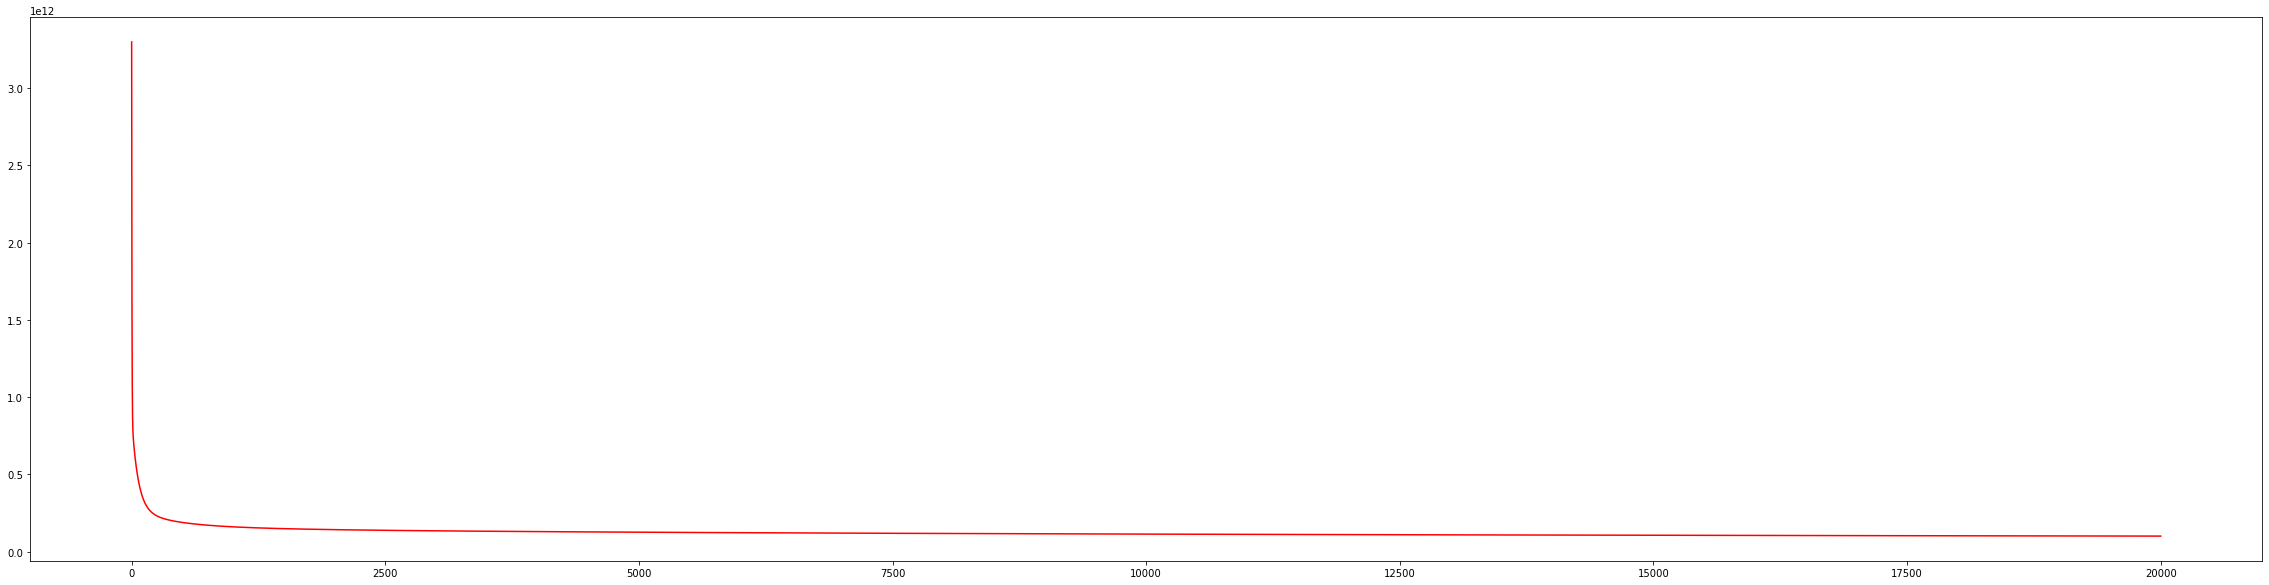

In [220]:
plt.figure(figsize=(40,10))
plt.plot(list(range(1,20001)),cost_history,color='red')

In [221]:
Y_prdeict = Xtest.dot(final_theta)

In [222]:
Y_prdeict  ####Our final pediction

array([[13605.4957768 ],
       [16981.59318005],
       [16398.53744425],
       [17383.6996784 ],
       [12680.88596359],
       [ 6039.56285625],
       [ 8869.42975223],
       [17065.25210163],
       [ 7434.85269456],
       [ 7585.7485846 ],
       [17005.14044182],
       [10966.34257514],
       [18065.35884009],
       [19258.07887495],
       [16904.84177758],
       [ 8430.42456651],
       [30565.36313272],
       [14796.00328766],
       [ 6524.56660529],
       [17978.35277767],
       [10770.15646123],
       [16708.35516809],
       [13732.58431379],
       [10625.37729413],
       [ 5769.32340677],
       [ 5402.27211929],
       [ 6488.91587612],
       [15116.83170489],
       [16349.22558032],
       [17069.45307014],
       [ 6118.66201129],
       [10296.2526017 ],
       [18409.08598821],
       [19395.81061516],
       [17857.829834  ],
       [ 6261.29760437],
       [16223.37258384],
       [ 9937.9385967 ],
       [ 6792.51075548],
       [10568.79064141],


In [223]:
Ytest 

array([[11900.   ],
       [18280.   ],
       [12629.   ],
       [17075.   ],
       [16430.   ],
       [ 7799.   ],
       [ 8195.   ],
       [11199.   ],
       [ 6938.   ],
       [ 7775.   ],
       [12940.   ],
       [ 9233.   ],
       [23875.   ],
       [17199.   ],
       [13495.   ],
       [ 8778.   ],
       [35550.   ],
       [18344.   ],
       [ 6649.   ],
       [16845.   ],
       [13645.   ],
       [16515.   ],
       [16630.   ],
       [10245.   ],
       [ 7349.   ],
       [ 6795.   ],
       [ 7129.   ],
       [18920.   ],
       [17710.   ],
       [15985.   ],
       [ 6488.   ],
       [13950.   ],
       [18950.   ],
       [21485.   ],
       [17859.167],
       [ 8916.5  ],
       [12964.   ],
       [11248.   ],
       [ 7198.   ],
       [10898.   ],
       [14399.   ]])